   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

<ipython-input-3-d67eb89d011d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)  # Înlocuirea valorilor lipsă cu mediana
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Acuratețea modelului: 0.7246


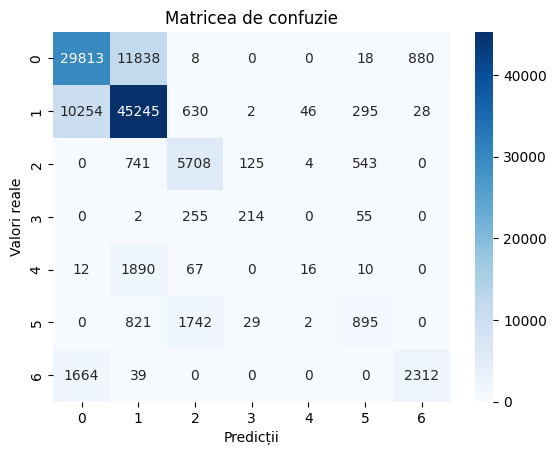

Raport de clasificare:
              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.68      0.80      0.74      7121
           4       0.58      0.41      0.48       526
           5       0.24      0.01      0.02      1995
           6       0.49      0.26      0.34      3489
           7       0.72      0.58      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



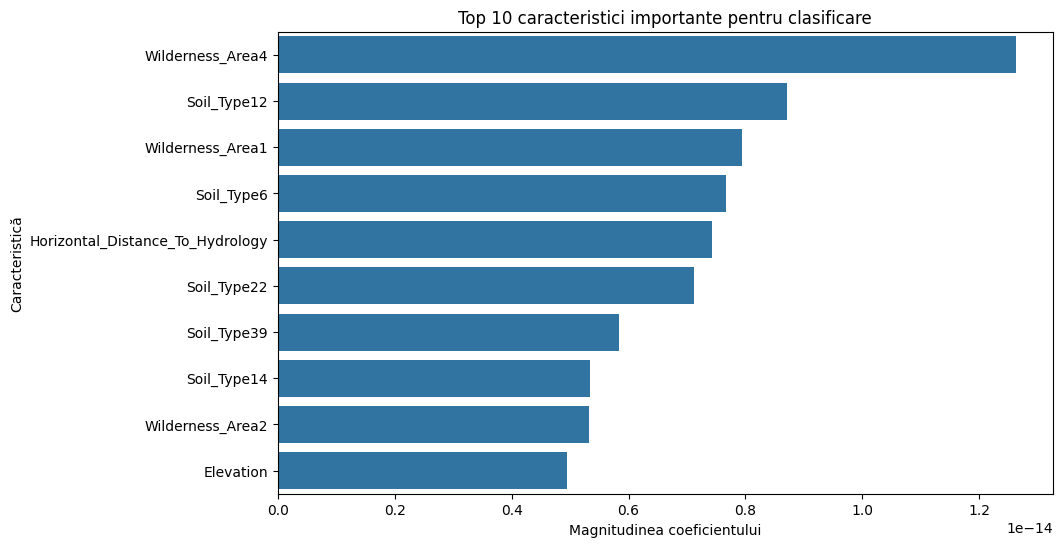

Impactul variabilelor independente asupra variabilei dependente:
Wilderness_Area4: coeficient = -0.0000
Soil_Type12: coeficient = 0.0000
Wilderness_Area1: coeficient = 0.0000
Soil_Type6: coeficient = -0.0000
Horizontal_Distance_To_Hydrology: coeficient = 0.0000
Soil_Type22: coeficient = 0.0000
Soil_Type39: coeficient = 0.0000
Soil_Type14: coeficient = -0.0000
Wilderness_Area2: coeficient = -0.0000
Elevation: coeficient = 0.0000


In [3]:
# Importarea bibliotecilor necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

# Încărcarea setului de date
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets

# Analiza inițială a datelor
print(X.head())
print(X.info())
print(X.describe())

# Verificarea valorilor lipsă și gestionarea acestora
print("Valori lipsă per coloană:")
print(X.isnull().sum())
X.fillna(X.median(), inplace=True)  # Înlocuirea valorilor lipsă cu mediana

# Normalizarea datelor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Împărțirea setului de date în antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Aplicarea metodei de regresie logistică
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

# Evaluarea performanței modelului
accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {accuracy:.4f}")

# Matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicții")
plt.ylabel("Valori reale")
plt.title("Matricea de confuzie")
plt.show()

# Raport de clasificare
print("Raport de clasificare:")
print(classification_report(y_test, y_pred))

# Analiza coeficienților modelului și impactul variabilelor independente asupra variabilei dependente
coefficients = model.coef_.mean(axis=0)
feature_names = X.columns
sorted_indices = np.argsort(abs(coefficients))[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=abs(coefficients[sorted_indices][:10]), y=[feature_names[i] for i in sorted_indices[:10]])
plt.xlabel("Magnitudinea coeficientului")
plt.ylabel("Caracteristică")
plt.title("Top 10 caracteristici importante pentru clasificare")
plt.show()

# Explicația impactului variabilelor independente
print("Impactul variabilelor independente asupra variabilei dependente:")
for i in sorted_indices[:10]:
    print(f"{feature_names[i]}: coeficient = {coefficients[i]:.4f}")


In [2]:
!pip install ucimlrepo
